In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp


In [3]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df = df.rename_axis(None)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df,"complete")
hc_average = linkage(df,"average")
hc_single = linkage(df,"single")

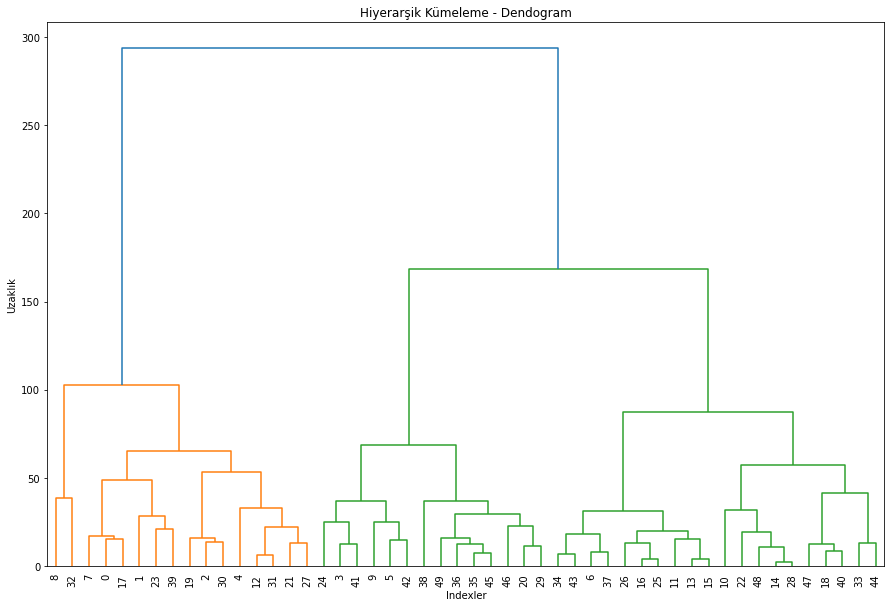

In [6]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklık")
dendrogram(hc_complete,leaf_font_size=10);

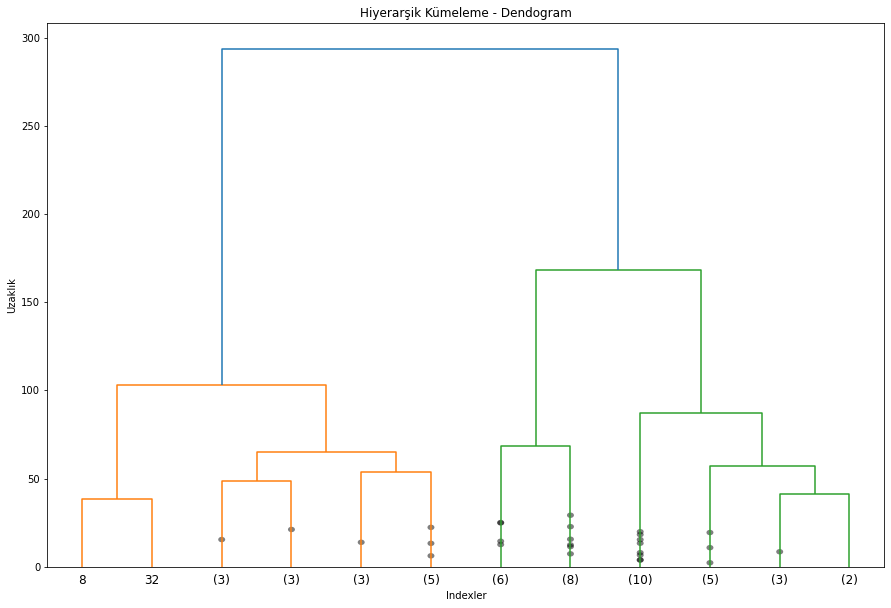

In [7]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklık")
dendrogram(hc_complete,
          truncate_mode= "lastp",
          p = 12,
          show_contracted=True);

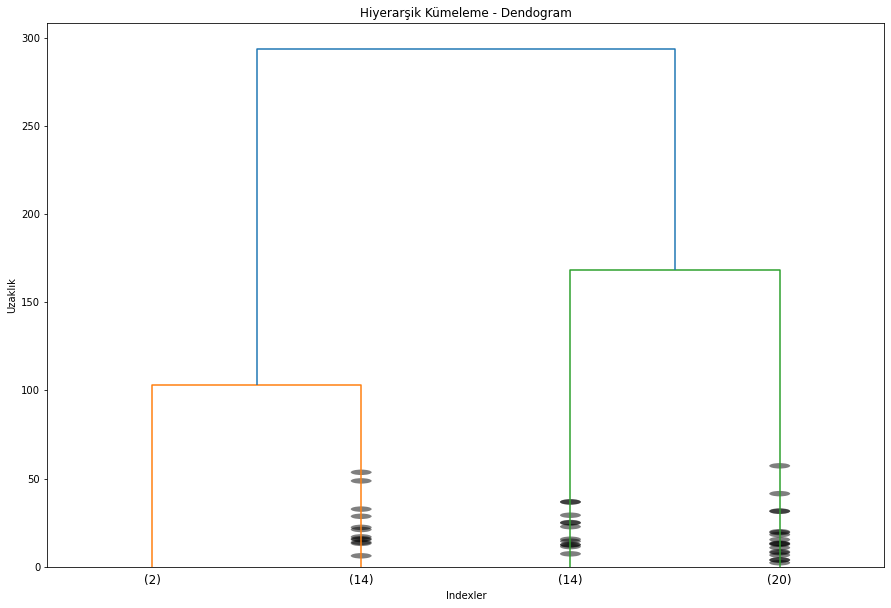

In [9]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklık")
dendrogram(hc_complete,
          truncate_mode= "lastp",
          p = 4,
          show_contracted=True);

# Optimum Küme Sayısı

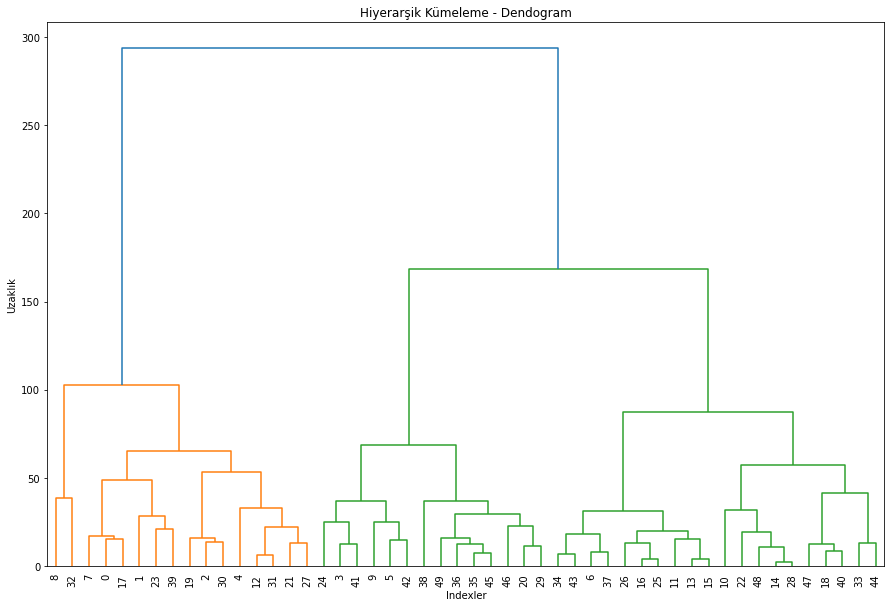

In [11]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklık")
den = dendrogram(hc_complete,leaf_font_size=10);

In [12]:
?dendrogram

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters= 4, affinity="euclidean",linkage="ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [15]:
pd.DataFrame({"Eyaletler": df.index, "Kümeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kümeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [16]:
df["kume_no"] = cluster.fit_predict(df)
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
